In [1]:
import os


pasta_atual = 'NC_dados'
#pasta_atual = os.getcwd()
arquivos_ecmwf = os.listdir(pasta_atual)
arquivos_ecmwf2 = [arq for arq in arquivos_ecmwf if arq.endswith('.nc') ]
arquivos_ecmwf2.sort() 
print(arquivos_ecmwf2)
#enumerar corretamente o .nc


['plotar20240321000000-006h-oper-fc.nc', 'plotar20240321000000-012h-oper-fc.nc', 'plotar20240321000000-018h-oper-fc.nc', 'plotar20240321000000-024h-oper-fc.nc', 'plotar20240321000000-030h-oper-fc.nc', 'plotar20240321000000-036h-oper-fc.nc', 'plotar20240321000000-042h-oper-fc.nc', 'plotar20240321000000-048h-oper-fc.nc', 'plotar20240321000000-054h-oper-fc.nc', 'plotar20240321000000-060h-oper-fc.nc', 'plotar20240321000000-066h-oper-fc.nc', 'plotar20240321000000-072h-oper-fc.nc', 'plotar20240321000000-078h-oper-fc.nc', 'plotar20240321000000-084h-oper-fc.nc', 'plotar20240321000000-090h-oper-fc.nc', 'plotar20240321000000-096h-oper-fc.nc', 'plotar20240321000000-102h-oper-fc.nc', 'plotar20240321000000-108h-oper-fc.nc', 'plotar20240321000000-114h-oper-fc.nc', 'plotar20240321000000-120h-oper-fc.nc']


C:\Users\fcasamento\AppData\Local\anaconda3\Lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
C:\Users\fcasamento\AppData\Local\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


21-03-2024 06:00:00
21-03-2024 12:00:00
21-03-2024 18:00:00
22-03-2024 00:00:00
22-03-2024 06:00:00
22-03-2024 12:00:00
22-03-2024 18:00:00
23-03-2024 00:00:00
23-03-2024 06:00:00
23-03-2024 12:00:00
23-03-2024 18:00:00
24-03-2024 00:00:00
24-03-2024 06:00:00
24-03-2024 12:00:00
24-03-2024 18:00:00
25-03-2024 00:00:00
25-03-2024 06:00:00
25-03-2024 12:00:00
25-03-2024 18:00:00
26-03-2024 00:00:00


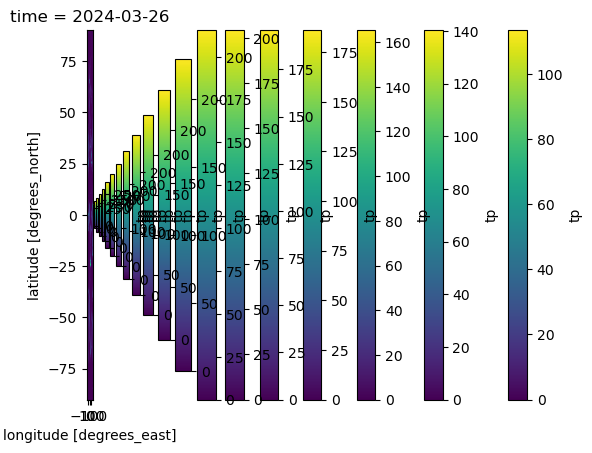

In [2]:
import xarray as xr


SOMA_EC= []
for arq_ec in arquivos_ecmwf2:
    EC = xr.open_mfdataset(os.path.join(pasta_atual,arq_ec), chunks={'time': 100})
    #print(ERA)

    chuva= EC['tp']*1000
    lista_data2= list(chuva.time.data)
    lista_data2= chuva.time.dt.strftime('%d-%m-%Y %H:%M:%S')
    lista_data2= list(lista_data2.data)
    print(lista_data2[0])

    chuva.plot()   
       
    SOMA_EC.append(chuva)

    
SOMA_EC= xr.concat(SOMA_EC, dim='Time')
 

        
        
        
        
        
        
        
        
        
        
        




In [3]:
arquivos_ecmwf2

['plotar20240321000000-006h-oper-fc.nc',
 'plotar20240321000000-012h-oper-fc.nc',
 'plotar20240321000000-018h-oper-fc.nc',
 'plotar20240321000000-024h-oper-fc.nc',
 'plotar20240321000000-030h-oper-fc.nc',
 'plotar20240321000000-036h-oper-fc.nc',
 'plotar20240321000000-042h-oper-fc.nc',
 'plotar20240321000000-048h-oper-fc.nc',
 'plotar20240321000000-054h-oper-fc.nc',
 'plotar20240321000000-060h-oper-fc.nc',
 'plotar20240321000000-066h-oper-fc.nc',
 'plotar20240321000000-072h-oper-fc.nc',
 'plotar20240321000000-078h-oper-fc.nc',
 'plotar20240321000000-084h-oper-fc.nc',
 'plotar20240321000000-090h-oper-fc.nc',
 'plotar20240321000000-096h-oper-fc.nc',
 'plotar20240321000000-102h-oper-fc.nc',
 'plotar20240321000000-108h-oper-fc.nc',
 'plotar20240321000000-114h-oper-fc.nc',
 'plotar20240321000000-120h-oper-fc.nc']

In [4]:
SOMA_EC

<xarray.DataArray 'tp' (Time: 20, time: 20, lat: 721, lon: 1440)>
dask.array<concatenate, shape=(20, 20, 721, 1440), dtype=float32, chunksize=(1, 20, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2024-03-21T06:00:00 ... 2024-03-26
  * lon      (lon) float64 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
Dimensions without coordinates: Time

In [5]:
soma_prec = SOMA_EC.sum(dim='time')
print("Soma da precipitação:", soma_prec)

Soma da precipitação: <xarray.DataArray 'tp' (Time: 20, lat: 721, lon: 1440)>
dask.array<sum-aggregate, shape=(20, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
Dimensions without coordinates: Time


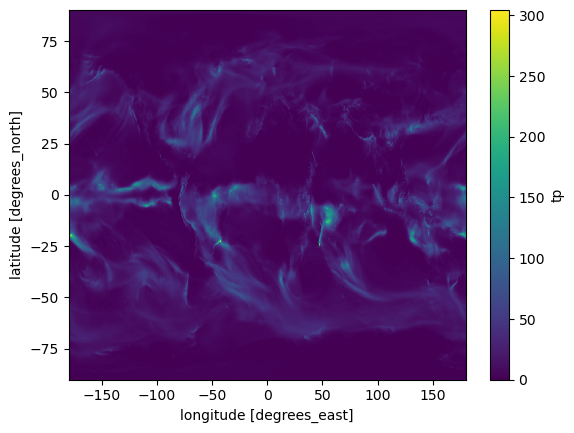

In [6]:
soma_prec[19].plot()

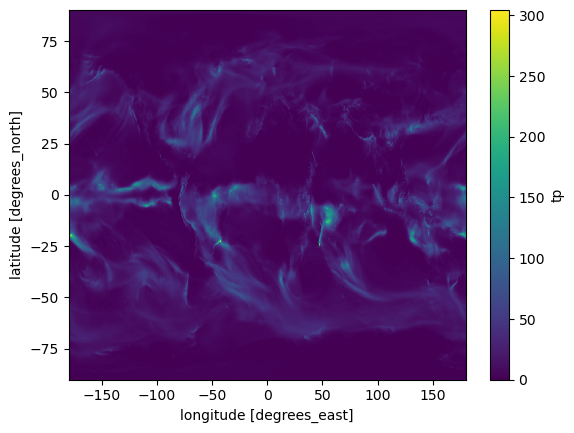

In [7]:
soma_prec[-1].plot()

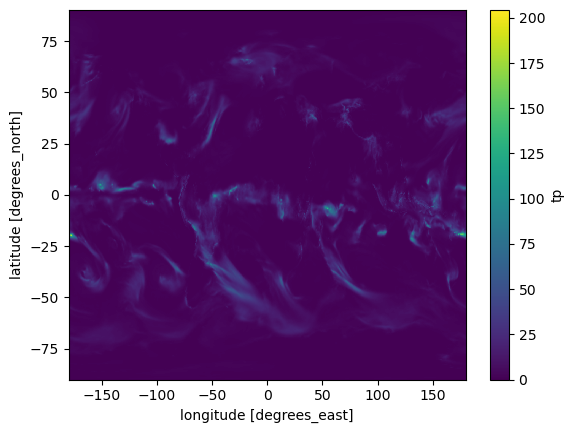

In [8]:
soma_prec[5].plot()

In [9]:
ds_corte = soma_prec.sel(lat = slice(-18,-24), lon = slice(-47,-39))

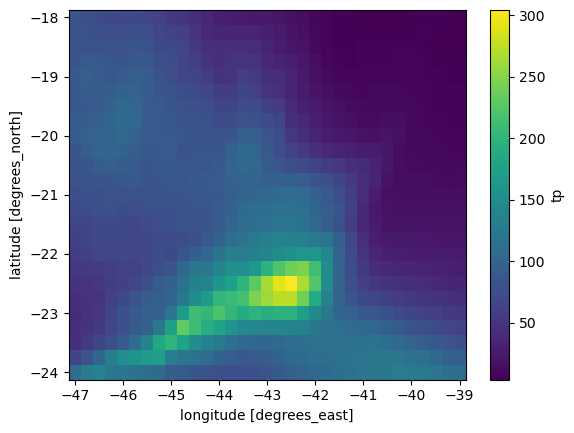

In [10]:
ds_corte[-1].plot()

In [11]:
ds_corte

<xarray.DataArray 'tp' (Time: 20, lat: 25, lon: 33)>
dask.array<getitem, shape=(20, 25, 33), dtype=float32, chunksize=(1, 25, 33), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -47.0 -46.75 -46.5 -46.25 ... -39.5 -39.25 -39.0
  * lat      (lat) float64 -18.0 -18.25 -18.5 -18.75 ... -23.5 -23.75 -24.0
Dimensions without coordinates: Time

In [12]:
lista_data2= list(SOMA_EC.time.data)
#print(lista_data2)
lista_data2= SOMA_EC.time.dt.strftime('%d-%m-%Y %H:%M:%S')
lista_data2= list(lista_data2.data)
print(lista_data2)

['21-03-2024 06:00:00', '21-03-2024 12:00:00', '21-03-2024 18:00:00', '22-03-2024 00:00:00', '22-03-2024 06:00:00', '22-03-2024 12:00:00', '22-03-2024 18:00:00', '23-03-2024 00:00:00', '23-03-2024 06:00:00', '23-03-2024 12:00:00', '23-03-2024 18:00:00', '24-03-2024 00:00:00', '24-03-2024 06:00:00', '24-03-2024 12:00:00', '24-03-2024 18:00:00', '25-03-2024 00:00:00', '25-03-2024 06:00:00', '25-03-2024 12:00:00', '25-03-2024 18:00:00', '26-03-2024 00:00:00']


In [13]:
print(lista_data2[0])
print(f'{lista_data2[0][0:2]}/{lista_data2[0][3:5]} a {lista_data2[-1][0:2]}/{lista_data2[-1][3:5]}/{lista_data2[-1][6:10]} às {lista_data2[-1][-8:-3]}')
data_titulo= f'{lista_data2[0][0:2]}/{lista_data2[0][3:5]} a {lista_data2[-1][0:2]}/{lista_data2[-1][3:5]}/{lista_data2[-1][6:10]} às {lista_data2[-1][-8:-3]}UTC'

21-03-2024 06:00:00
21/03 a 26/03/2024 às 00:00


In [14]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature
import cartopy.io.shapereader as shpreader  # Import shapefiles

In [15]:
# Assuming 'lat' and 'lon' are the dimension names, replace them with your actual dimension names
new_lon = np.linspace(ds_corte[-1].lon[0], ds_corte[-1].lon[-1], ds_corte[-1].sizes["lon"] * 7)
new_lat = np.linspace(ds_corte[-1].lat[0], ds_corte[-1].lat[-1], ds_corte[-1].sizes["lat"] * 7)

# Use dimension names instead of string indices
NEW_prec_total = ds_corte[-1].interp(lat=new_lat, lon=new_lon)


In [16]:
NEW_prec_total

<xarray.DataArray 'tp' (lat: 175, lon: 231)>
dask.array<chunked_aware_interpnd, shape=(175, 231), dtype=float32, chunksize=(175, 231), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -18.0 -18.03 -18.07 -18.1 ... -23.93 -23.97 -24.0
  * lon      (lon) float64 -47.0 -46.97 -46.93 -46.9 ... -39.07 -39.03 -39.0

In [17]:
# Encontrar o índice do valor máximo na matriz
max_value_index = np.unravel_index(np.argmax(NEW_prec_total.values), NEW_prec_total.shape)

# Extrair coordenadas (longitude e latitude) do valor máximo
max_lon = NEW_prec_total.lon[max_value_index[1]]
max_lat = NEW_prec_total.lat[max_value_index[0]]
max_precipitation = NEW_prec_total.values[max_value_index]


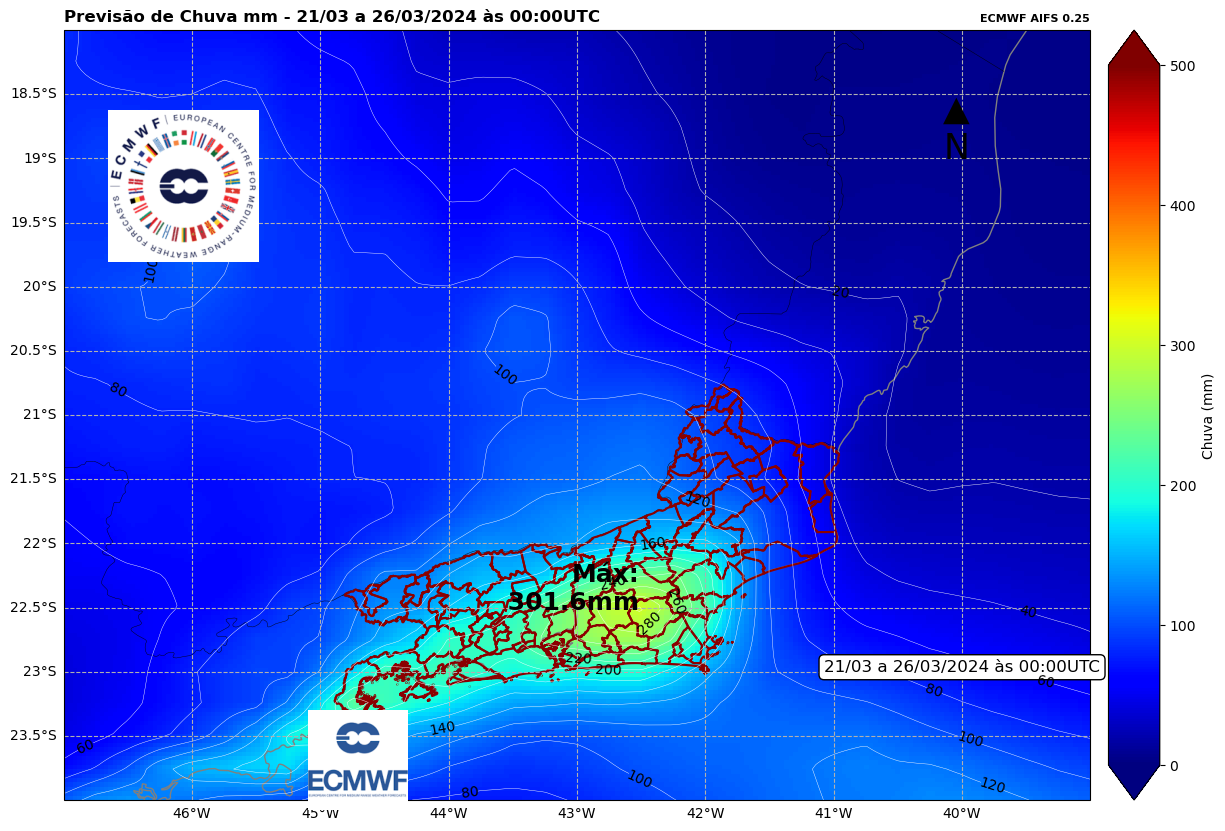

In [18]:
# Configura o tamanho do plot
fig = plt.figure(figsize=(15, 10))

# Define a projeção
ax = plt.axes(projection=ccrs.PlateCarree())

# Adiciona linha de costa, terra, borda
ax.coastlines(resolution='10m', color='grey')
ax.add_feature(cartopy.feature.LAND, facecolor='silver')
ax.add_feature(cartopy.feature.BORDERS, edgecolor='gray')

# Define a área do plot
limites = [-47, -39, -24, -18]

ax.set_extent(limites, crs=ccrs.PlateCarree())

# Adjust the contour levels based on the data range
# Plot the image
img1 = ax.imshow(NEW_prec_total, origin='upper', extent=limites, vmin=0, vmax=500, cmap='jet') 

# Adicionar marcador para o máximo
#ax.plot(max_lon, max_lat, marker='o', color='red', markersize=5)

# Adicionar uma legenda para o marcador
ax.text(max_lon, max_lat, f'Máx:\n {max_precipitation:.1f}mm', color='black', fontweight='bold', fontsize=18, ha='right')



# Define contour levels
data_min = 0
data_max = 700
interval = 20
levels = np.arange(data_min, data_max, interval)

    
lons, lats = np.meshgrid(NEW_prec_total.lon, NEW_prec_total.lat)

#contorno havia ficado antes de ponta cabeça

# prec_total_mes[0][::-1, :] 
contour = ax.contour(lons, lats, NEW_prec_total, colors='white', linewidths=0.3, levels=levels, origin='upper')
ax.clabel(contour, inline=1, inline_spacing=0, fontsize=10, fmt='%1.0f', colors='black')

# Adicionando título
plt.title(f'Previsão de Chuva mm - {data_titulo}', fontweight='bold', loc='left')
plt.title('ECMWF AIFS 0.25', fontweight='bold', fontsize=8, loc='right')

# Adicionando os limites dos estados
shapefile_path = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_1_states_provinces_lines')
shapefile = shpreader.Reader(shapefile_path).geometries()
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.3)

shapefile = list(shpreader.Reader('../WRF_CPTEC/RJ_municipios/RJ_Municipios_2022.shp').geometries())
#https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html

ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='darkred',facecolor='none', linewidth=1.5)

# Configuração das grades
gl = ax.gridlines(linestyle='--', xlocs=np.arange(-55, -38, 1), ylocs=np.arange(-30, -15, 0.5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False


 # Adicionando a barra de cor
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    

    

axins = inset_axes(ax, width="5%", height="100%", loc='right', borderpad=-5)
cbar = fig.colorbar(img1, cax=axins, orientation='vertical', label='Chuva (mm)', extend='both')
    
# North Arrow
ax.annotate(u'\u25B2 \nN ', ha='center', fontsize=25, xy=(-40, -19))
    
# Data box
box = dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
ax.annotate(data_titulo, ha='center', fontsize=12, xy=(-40, -23), bbox=box)
#------------------logo----------------------------
#plt.savefig(f'figuras_plot_cfsvw/chuva_cfs_modelo3{i}.png',bbox_inches='tight', dpi=100)
# Mostra o plot
im_log1 = plt.imread(("ecmwflogo.png"))

#MEXER NAS POSIÇÕES 1 = Y 2 = Y (menor mais para baixo), 3 X (maior mais para o lado)

newax = fig.add_axes([0.3,0.1,0.1,0.1], anchor='NE',zorder=0)
#newax = fig.add_axes([-0.1,0.5,0.5,0.3], anchor='NE', zorder=1)

newax.imshow(im_log1)
    
    
im_log2=plt.imread(("logo_ecmwf.png"))
#MEXER NAS POSIÇÕES 1 = Y 2 = Y (menor mais para baixo), 3 X (maior mais para o lado)

newax1 = fig.add_axes([0.2,0.6,0.1,0.2], anchor='NE',zorder=0)
#newax = fig.add_axes([-0.1,0.5,0.5,0.3], anchor='NE', zorder=1)

newax1.imshow(im_log2)    
    
# plt.savefig(f'chuva_cfs_modelo3{j}.png',bbox_inches='tight', dpi=100)

#    
newax.axis('off') 
newax1.axis('off') 




#plt.savefig(f'Figuras_CFSV2_GRIB/chuva_cfs_modelo3_contorno{j}.png',bbox_inches='tight', dpi=100)

plt.show()
    

In [19]:
#cálculo da chuva mensal, quero agrupar os dados, que vem horária
ds_mensal = SOMA_EC.groupby('time.month').sum(dim = 'time')
ds_mensal

<xarray.DataArray 'tp' (Time: 20, month: 1, lat: 721, lon: 1440)>
dask.array<transpose, shape=(20, 1, 721, 1440), dtype=float32, chunksize=(1, 1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * month    (month) int64 3
Dimensions without coordinates: Time

In [20]:
ds_mensal[0]

<xarray.DataArray 'tp' (month: 1, lat: 721, lon: 1440)>
dask.array<getitem, shape=(1, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * month    (month) int64 3

In [21]:
ds_corte = ds_mensal.sel(lat = slice(-18,-24), lon = slice(-47,-39))

In [22]:
ds_corte

<xarray.DataArray 'tp' (Time: 20, month: 1, lat: 25, lon: 33)>
dask.array<getitem, shape=(20, 1, 25, 33), dtype=float32, chunksize=(1, 1, 25, 33), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -47.0 -46.75 -46.5 -46.25 ... -39.5 -39.25 -39.0
  * lat      (lat) float64 -18.0 -18.25 -18.5 -18.75 ... -23.5 -23.75 -24.0
  * month    (month) int64 3
Dimensions without coordinates: Time

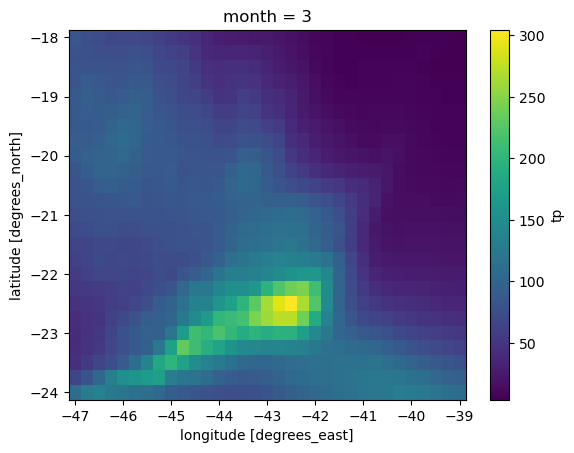

In [23]:
ds_corte[-1].plot()

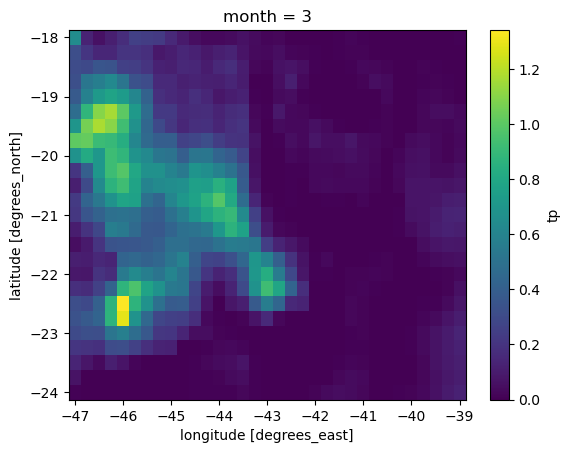

In [24]:
ds_corte[0].plot()

In [25]:
# Assuming 'lat' and 'lon' are the dimension names, replace them with your actual dimension names
new_lon = np.linspace(ds_corte[-1].lon[0], ds_corte[-1].lon[-1], ds_corte[-1].sizes["lon"] * 7)
new_lat = np.linspace(ds_corte[-1].lat[0], ds_corte[-1].lat[-1], ds_corte[-1].sizes["lat"] * 7)

# Use dimension names instead of string indices
NEW_prec_total = ds_corte[-1].interp(lat=new_lat, lon=new_lon)


In [26]:
NEW_prec_total[0]

<xarray.DataArray 'tp' (lat: 175, lon: 231)>
dask.array<getitem, shape=(175, 231), dtype=float32, chunksize=(175, 231), chunktype=numpy.ndarray>
Coordinates:
    month    int64 3
  * lat      (lat) float64 -18.0 -18.03 -18.07 -18.1 ... -23.93 -23.97 -24.0
  * lon      (lon) float64 -47.0 -46.97 -46.93 -46.9 ... -39.07 -39.03 -39.0

In [27]:
# Encontrar o índice do valor máximo na matriz
max_value_index = np.unravel_index(np.argmax(NEW_prec_total[0].values), NEW_prec_total[0].shape)

# Extrair coordenadas (longitude e latitude) do valor máximo
max_lon = NEW_prec_total[0].lon[max_value_index[1]]
max_lat = NEW_prec_total[0].lat[max_value_index[0]]
max_precipitation = NEW_prec_total[0].values[max_value_index]


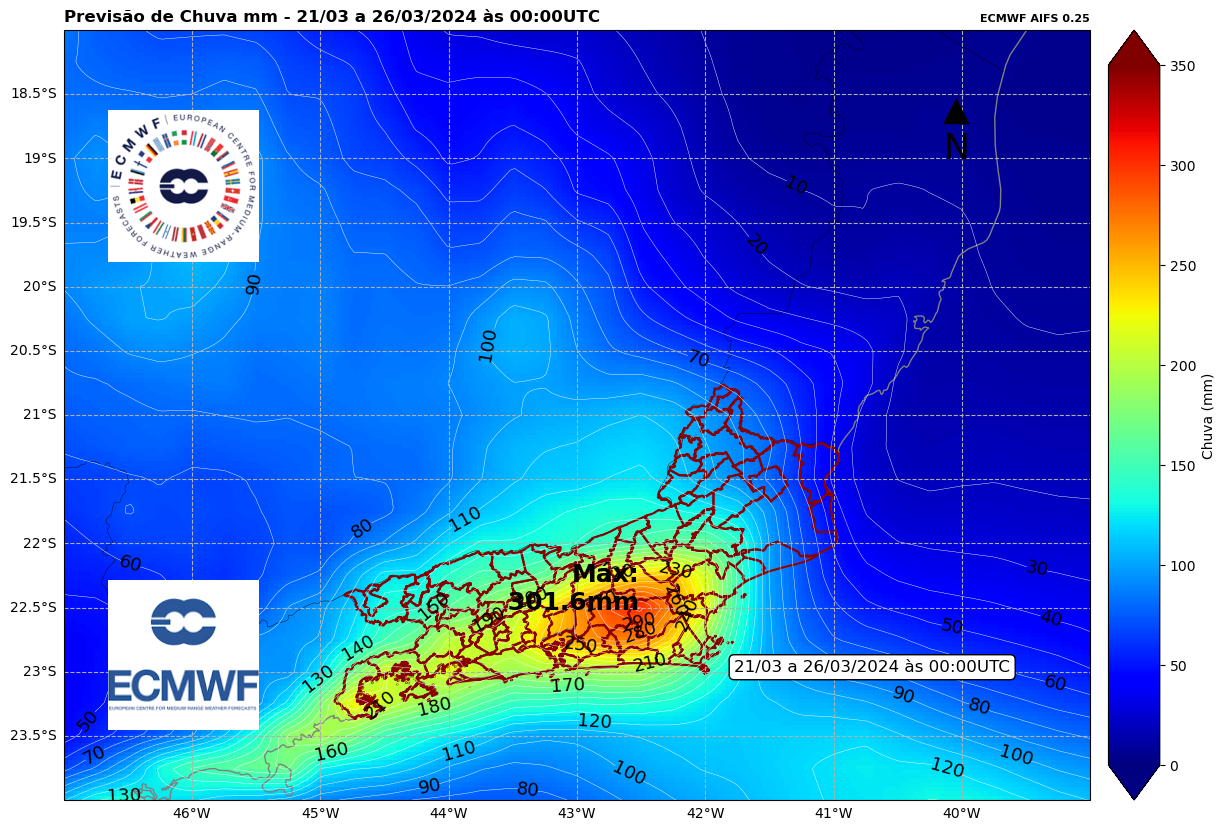

In [28]:


# Configura o tamanho do plot
fig = plt.figure(figsize=(15, 10))

# Define a projeção
ax = plt.axes(projection=ccrs.PlateCarree())

# Adiciona linha de costa, terra, borda
ax.coastlines(resolution='10m', color='grey')
ax.add_feature(cartopy.feature.LAND, facecolor='silver')
ax.add_feature(cartopy.feature.BORDERS, edgecolor='gray')

# Define a área do plot
limites = [-47, -39, -24, -18]

ax.set_extent(limites, crs=ccrs.PlateCarree())

# Adjust the contour levels based on the data range
# Plot the image
#img1 = ax.imshow(NEW_prec_total[0], origin='lower', extent=limites, vmin=0, vmax=500, cmap='jet') 
img1 = ax.imshow(NEW_prec_total[0], origin='upper', extent=limites, vmin=0, vmax=350, cmap='jet') 

# Define contour levels
data_min = 0
data_max = 400
interval = 10
levels = np.arange(data_min, data_max, interval)

    
lons, lats = np.meshgrid(NEW_prec_total[0].lon, NEW_prec_total[0].lat)

#contorno havia ficado antes de ponta cabeça

# prec_total_mes[0][::-1, :] 

contour = ax.contour(lons, lats, NEW_prec_total[0], colors='white', linewidths=0.3, levels=levels, origin='lower')

#contour = ax.contour(lons, lats, NEW_prec_total[0][::-1, :], colors='white', linewidths=0.3, levels=levels, origin='lower')
ax.clabel(contour, inline=1, inline_spacing=0, fontsize=13, fmt='%1.0f', colors='black')


# Adicionar marcador para o máximo
#ax.plot(max_lon, max_lat, marker='o', color='red', markersize=5)

# Adicionar uma legenda para o marcador
ax.text(max_lon, max_lat, f'Máx:\n {max_precipitation:.1f}mm', color='black', fontweight='bold', fontsize=18, ha='right')


# Adicionando título
plt.title(f'Previsão de Chuva mm - {data_titulo}', fontweight='bold', loc='left')
plt.title('ECMWF AIFS 0.25', fontweight='bold', fontsize=8, loc='right')

# Adicionando os limites dos estados
shapefile_path = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_1_states_provinces_lines')
shapefile = shpreader.Reader(shapefile_path).geometries()
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.3)

shapefile = list(shpreader.Reader('../WRF_CPTEC/RJ_municipios/RJ_Municipios_2022.shp').geometries())
#https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html

ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='darkred',facecolor='none', linewidth=1.5)

# Configuração das grades
gl = ax.gridlines(linestyle='--', xlocs=np.arange(-55, -38, 1), ylocs=np.arange(-30, -15, 0.5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False


 # Adicionando a barra de cor
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    

    

axins = inset_axes(ax, width="5%", height="100%", loc='right', borderpad=-5)
cbar = fig.colorbar(img1, cax=axins, orientation='vertical', label='Chuva (mm)', extend='both')
    
# North Arrow
ax.annotate(u'\u25B2 \nN ', ha='center', fontsize=25, xy=(-40, -19))
    
# Data box
box = dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
ax.annotate(data_titulo, ha='center', fontsize=12, xy=(-40.7, -23), bbox=box)
#------------------logo----------------------------
#plt.savefig(f'figuras_plot_cfsvw/chuva_cfs_modelo3{i}.png',bbox_inches='tight', dpi=100)
# Mostra o plot
im_log1 = plt.imread(("ecmwflogo.png"))

#MEXER NAS POSIÇÕES 1 = Y 2 = Y (menor mais para baixo), 3 X (maior mais para o lado)

newax = fig.add_axes([0.2,0.13,0.1,0.2], anchor='NE',zorder=0)
#newax = fig.add_axes([-0.1,0.5,0.5,0.3], anchor='NE', zorder=1)

newax.imshow(im_log1)
    
im_log2=plt.imread(("logo_ecmwf.png"))
    
#im_log2=plt.imread(("../WRF_CPTEC/logo-lentz.png"))
#MEXER NAS POSIÇÕES 1 = Y 2 = Y (menor mais para baixo), 3 X (maior mais para o lado)


newax1 = fig.add_axes([0.2,0.6,0.1,0.2], anchor='NE',zorder=0)
#newax = fig.add_axes([-0.1,0.5,0.5,0.3], anchor='NE', zorder=1)

newax1.imshow(im_log2)    
    
# plt.savefig(f'chuva_cfs_modelo3{j}.png',bbox_inches='tight', dpi=100)

#    
newax.axis('off') 
newax1.axis('off') 




#plt.savefig(f'Figuras_CFSV2_GRIB/chuva_cfs_modelo3_contorno{j}.png',bbox_inches='tight', dpi=100)

plt.show()

https://data.ecmwf.int/forecasts/20240321/00z/aifs/0p25/oper/

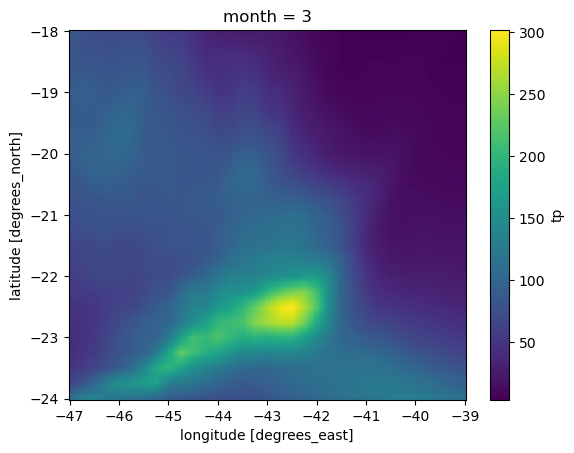

In [29]:
NEW_prec_total.plot()

In [30]:
#tirar o 00 utc, para criar a figura


https://data.ecmwf.int/forecasts/20240321/00z/aifs/0p25/oper/